# RAGA IDENTIFICATION

This notebook explores Raga classification using deep learning models. The dataset consists of 320 songs, each 2 minutes long, spanning 8 different ragas. A custom dataset was created for this task, with features extracted from the audio files to train and evaluate models.

Models Implemented:

Simple CNN:  A convolutional neural network for feature extraction and classification.

**LSTM –** A recurrent neural network (RNN) model for learning temporal patterns in the audio data.

**LSTM + TDNN –** A hybrid model combining LSTM (for sequential dependencies) and TDNN (Time-Delay Neural Network) for enhanced feature learning.

# Workflow:

**Preprocessing:** Feature extraction from audio files (MFCC, scale features, etc.).

**Training:** Training and evaluating the three models on the dataset.

**Comparison:** Performance evaluation and comparison of the models to determine the most effective approach.

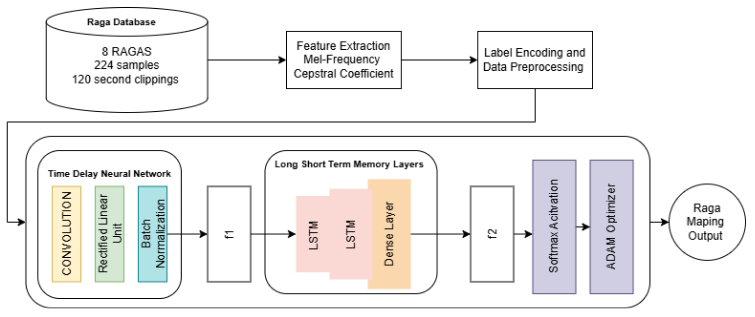

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa

In [ ]:
#Plotting mel Spectogram

import matplotlib.pyplot as plt
import numpy as np
import librosa.display

plt.figure(figsize=(15, 10))

# First audio sample
plt.subplot(5, 2, 1)
S1 = librosa.feature.melspectrogram(y=y1, sr=sr1)
librosa.display.specshow(librosa.power_to_db(S1, ref=np.max), sr=sr1, y_axis='mel', x_axis='time')
plt.title('y1')

# Second audio sample
plt.subplot(5, 2, 2)
S2 = librosa.feature.melspectrogram(y=y2, sr=sr2)
librosa.display.specshow(librosa.power_to_db(S2, ref=np.max), sr=sr2, y_axis='mel', x_axis='time')
plt.title('y2')

# Third audio sample
plt.subplot(5, 2, 3)
S3 = librosa.feature.melspectrogram(y=y3, sr=sr3)
librosa.display.specshow(librosa.power_to_db(S3, ref=np.max), sr=sr3, y_axis='mel', x_axis='time')
plt.title('y3')

# Fourth audio sample
plt.subplot(5, 2, 4)
S4 = librosa.feature.melspectrogram(y=y4, sr=sr4)
librosa.display.specshow(librosa.power_to_db(S4, ref=np.max), sr=sr4, y_axis='mel', x_axis='time')
plt.title('y4')

# Fifth audio sample
plt.subplot(5, 2, 5)
S5 = librosa.feature.melspectrogram(y=y5, sr=sr5)
librosa.display.specshow(librosa.power_to_db(S5, ref=np.max), sr=sr5, y_axis='mel', x_axis='time')
plt.title('y5')

# Sixth audio sample
plt.subplot(5, 2, 6)
S6 = librosa.feature.melspectrogram(y=y6, sr=sr6)
librosa.display.specshow(librosa.power_to_db(S6, ref=np.max), sr=sr6, y_axis='mel', x_axis='time')
plt.title('y6')

# Seventh audio sample
plt.subplot(5, 2, 7)
S7 = librosa.feature.melspectrogram(y=y7, sr=sr7)
librosa.display.specshow(librosa.power_to_db(S7, ref=np.max), sr=sr7, y_axis='mel', x_axis='time')
plt.title('y7')

# Eighth audio sample
plt.subplot(5, 2, 8)
S8 = librosa.feature.melspectrogram(y=y8, sr=sr8)
librosa.display.specshow(librosa.power_to_db(S8, ref=np.max), sr=sr8, y_axis='mel', x_axis='time')
plt.title('y8')

plt.tight_layout()
plt.show()

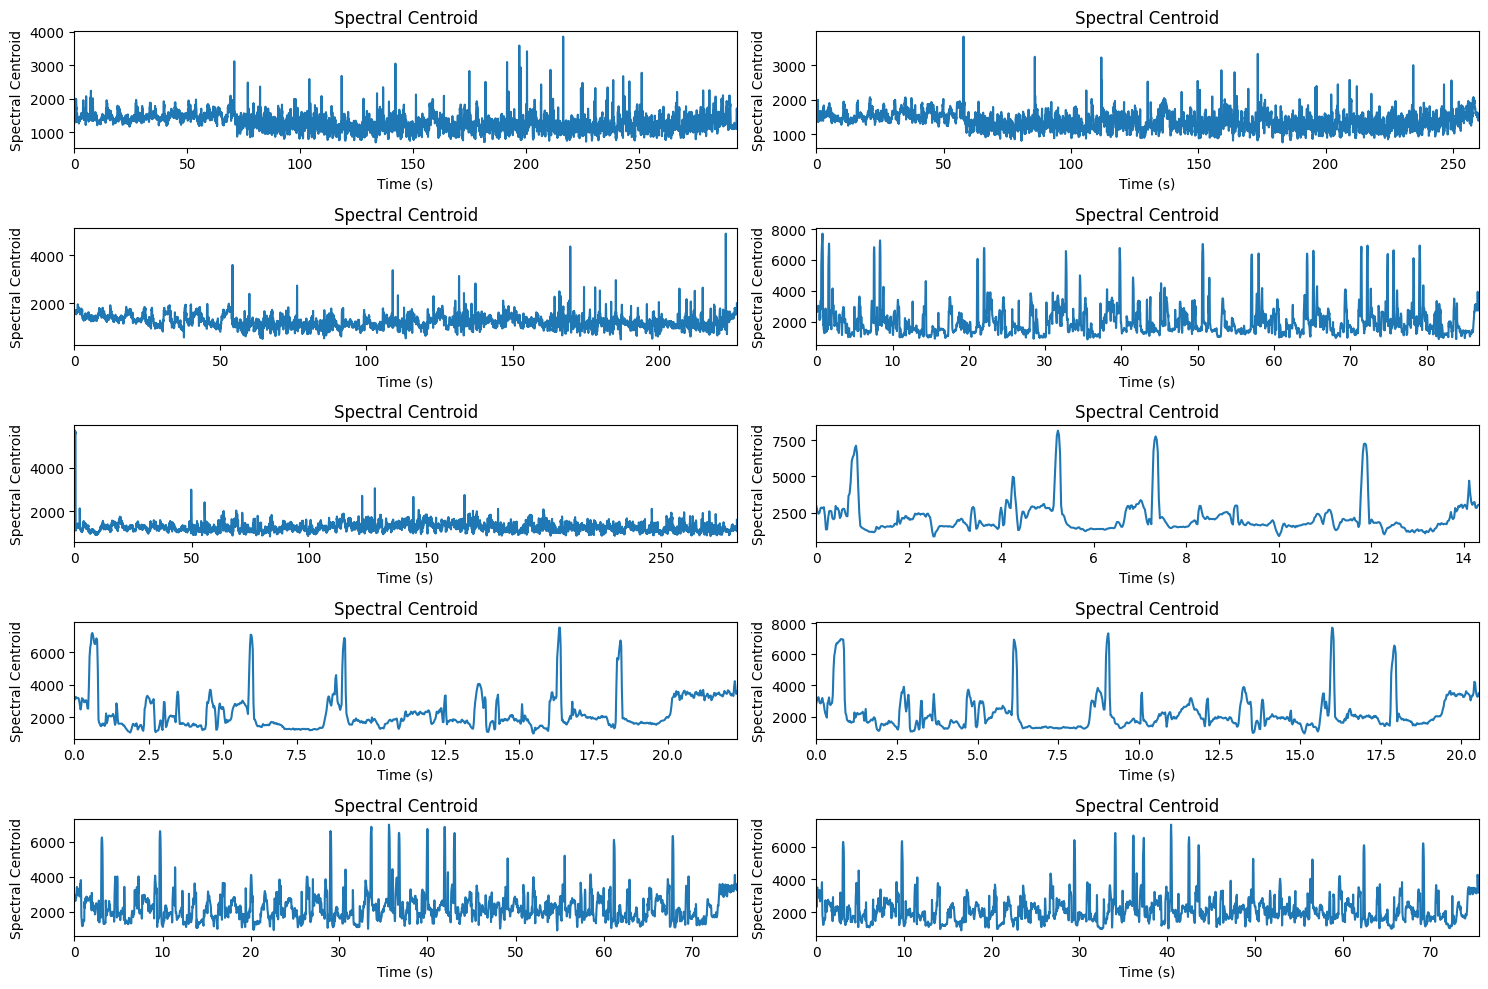

In [ ]:
# Plotting spectral centroid
plt.figure(figsize=(15, 10))

def plot_spectral_centroid(y, sr, subplot_index, title):
    ax = plt.subplot(5, 2, subplot_index)
    centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    centroids = centroids + 1e-10  # Avoid log(0) issues
    times = librosa.times_like(centroids)

    plt.plot(times, centroids)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Centroid')
    plt.xlim([0, times[-1]])  # Ensure x-axis is properly scaled

# Assuming y1, sr1, ..., y10, sr10 are your audio data and sample rates
plot_spectral_centroid(y1, sr1, 1, 'Spectral Centroid')
plot_spectral_centroid(y2, sr2, 2, 'Spectral Centroid')
plot_spectral_centroid(y3, sr3, 3, 'Spectral Centroid')
plot_spectral_centroid(y4, sr4, 4, 'Spectral Centroid')
plot_spectral_centroid(y5, sr5, 5, 'Spectral Centroid')
plot_spectral_centroid(y6, sr6, 6, 'Spectral Centroid')
plot_spectral_centroid(y7, sr7, 7, 'Spectral Centroid')
plot_spectral_centroid(y8, sr8, 8, 'Spectral Centroid')
plot_spectral_centroid(y9, sr9, 9, 'Spectral Centroid')
plot_spectral_centroid(y10, sr10, 10, 'Spectral Centroid')

plt.tight_layout()
plt.show()

In [ ]:
# Calculating Zero crossing rate
audio_data = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]

# Loop through each audio sample
for i, y in enumerate(audio_data, start=1):
    # Calculate zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y)

    # Print the results
    print(f"zcr{i}")
    print('max:', zcr.max())
    print('min:', zcr.min())
    print("-------------------------------")

zcr1
max: 0.1669921875
min: 0.01123046875
-------------------------------
zcr2
max: 0.15576171875
min: 0.0263671875
-------------------------------
zcr3
max: 0.34326171875
min: 0.01953125
-------------------------------
zcr4
max: 0.7021484375
min: 0.01513671875
-------------------------------
zcr5
max: 0.58203125
min: 0.02001953125
-------------------------------
zcr6
max: 0.7373046875
min: 0.01953125
-------------------------------
zcr7
max: 0.64501953125
min: 0.015625
-------------------------------
zcr8
max: 0.6552734375
min: 0.015625
-------------------------------
zcr9
max: 0.59814453125
min: 0.0166015625
-------------------------------
zcr10
max: 0.63134765625
min: 0.0146484375
-------------------------------


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Sample audio data (replace with your actual data)
audio_data = [(y1, sr1), (y2, sr2), (y3, sr3), (y4, sr4), (y5, sr5),
              (y6, sr6), (y7, sr7), (y8, sr8)]  # Ensure you have 8 samples
ragas = ['Bhairavi', 'Abhogi', 'Hamsanamdham', 'Mayamalavagowla',
         'Hindolam', 'Simendramadyamam', 'Nattai', 'Vasantha']  # Corresponding raga names

# Initialize an array to hold mean MFCC values
mean_mfcc_values = []

# Loop through each audio sample
for (y, sr) in audio_data:
    # Calculate MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    # Calculate mean MFCC across time
    mean_mfcc = np.mean(mfcc, axis=1)
    # Store the mean MFCC for the first coefficient (index 0)
    mean_mfcc_values.append(mean_mfcc[0])  # Change the index as needed for different coefficients

# Normalize mean MFCC values for better scaling
scaled_values = [value / np.max(mean_mfcc_values) for value in mean_mfcc_values]

# Create a bar graph
plt.figure(figsize=(12, 8))

# Use a colormap to create more colorful bars
colors = cm.viridis(np.linspace(0, 1, len(ragas)))  # Choose a colormap

# Create bars with colors and scaling
plt.bar(ragas, scaled_values, color=colors)
plt.title('Mean MFCC Values for 8 Ragas')
plt.xlabel('Ragas')
plt.ylabel('Scaled Mean MFCC Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding value labels on top of each bar
for i, value in enumerate(scaled_values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


NameError: name 'y1' is not defined

**TRAINING OF MODEL USING FEATURES**

**DATA PREPROCESSING **

In [ ]:
import os
import pandas as pd
import numpy as np

# Dictionary containing raga scales
raga_scales = {
    'mayamalavagowla': {
        'arohanam': ['S', 'R1', 'G3', 'M1', 'P', 'D1', 'N3', 'S'],
        'avarohanam': ['S', 'N3', 'D1', 'P', 'M1', 'G3', 'R1', 'S']
    },
    'hindolam': {
        'arohanam': ['S', 'G2', 'M1', 'D1', 'N2', 'S'],
        'avarohanam': ['S', 'N2', 'D1', 'M1', 'G2', 'S']
    },
    'hamsanadam': {
        'arohanam': ['S', 'R2', 'M2', 'P', 'N3', 'S'],
        'avarohanam': ['S', 'N3', 'P', 'M2', 'R2', 'S']
    },
    'abhogi': {
        'arohanam': ['S', 'R2', 'G2', 'M1', 'D2', 'S'],
        'avarohanam': ['S', 'D2', 'M1', 'G2', 'R2', 'S']
    },
    'vasantha': {
        'arohanam': ['S', 'R1', 'G3', 'M1', 'D2', 'N3', 'S'],
        'avarohanam': ['S', 'N3', 'D2', 'M1', 'G3', 'R1', 'S']
    },
    'bhairavi': {
        'arohanam': ['S', 'G2', 'R2', 'G2', 'M1', 'P', 'D2', 'N2', 'S'],
        'avarohanam': ['S', 'N2', 'D1', 'P', 'M1', 'G2', 'R2', 'S']
    },
    'saranga': {
        'arohanam': ['S', 'R2', 'G2', 'M2', 'P', 'D1', 'N3', 'S'],
        'avarohanam': ['S', 'N3', 'D1', 'P', 'M2', 'G2', 'R2', 'S']
    },
    'nattai': {
        'arohanam': ['S', 'R3', 'G3', 'M1', 'P3', 'D3', 'N3', 'S'],
        'avarohanam': ['S', 'N3', 'D3', 'P3', 'M1', 'G3', 'R3', 'S']
    }
}

def encode_scale(scale):
    """
    Convert scale notation to numerical features
    This creates a simple encoding where each note type gets a unique number
    """
    note_mapping = {
        'S': 1,
        'R1': 2, 'R2': 3, 'R3': 4,
        'G1': 5, 'G2': 6, 'G3': 7,
        'M1': 8, 'M2': 9,
        'P': 10, 'P3': 11,
        'D1': 12, 'D2': 13, 'D3': 14,
        'N1': 15, 'N2': 16, 'N3': 17
    }

    # Convert scale to numerical values and pad to fixed length
    max_length = 9  # Maximum length among all scales
    encoded = [note_mapping.get(note, 0) for note in scale]
    # Pad with zeros if needed
    encoded.extend([0] * (max_length - len(encoded)))
    return encoded

def get_scale_features(raga_name):
    """
    Get encoded features for a raga's arohanam and avarohanam
    """
    raga_name = raga_name.lower()
    if raga_name not in raga_scales:
        # Return zeros if raga not found
        return [0] * 18  # 9 features each for arohanam and avarohanam

    scales = raga_scales[raga_name]
    arohanam_features = encode_scale(scales['arohanam'])
    avarohanam_features = encode_scale(scales['avarohanam'])

    return arohanam_features + avarohanam_features



In [ ]:
audio_dataset_path = "/content/drive/MyDrive/testing_data"

In [ ]:
import librosa
def features_extractor(audio_path):
    audio, sample_rate = librosa.load(audio_path, res_type='scipy')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
# Iterating over each audio file, extracting MFCC features, and storing them along with the class label
data = []
for audio_file in os.listdir(audio_dataset_path):
    audio_path = os.path.join(audio_dataset_path, audio_file)
    mfccs = features_extractor(audio_path)
    if mfccs is not None:
        class_label = audio_file.split('.')[0]
        data.append([mfccs, class_label])

# Create a DataFrame
df = pd.DataFrame(data, columns=['the extracted feature', 'class'])

In [ ]:
# Modified data collection loop
import re
data = []
for audio_file in os.listdir(audio_dataset_path):
    audio_path = os.path.join(audio_dataset_path, audio_file)
    mfccs = features_extractor(audio_path)

    if mfccs is not None:
        class_label = audio_file.split('.')[0]
        class_label = re.match(r'([a-zA-Z]+)', audio_file).group(1).lower()
        # Get scale features for the raga
        scale_features = get_scale_features(class_label)

        # Combine MFCC and scale features
        all_features = np.concatenate([mfccs.flatten(), scale_features])
        data.append([all_features, class_label])

# Create DataFrame with combined features
df = pd.DataFrame(data, columns=['features', 'class'])
# If you need to separate the features later:
def split_features(feature_vector):
    """
    Split combined feature vector back into MFCC and scale features
    """
    mfcc_length = len(feature_vector) - 18  # 18 is the length of scale features
    mfcc_features = feature_vector[:mfcc_length]
    scale_features = feature_vector[mfcc_length:]
    return mfcc_features, scale_features

In [ ]:
all_features

array([-142.76255798,   77.95440674,  -43.69507599,   23.14211082,
        -12.261549  ,   -3.21012926,  -29.49641609,   -1.16355038,
        -23.41318512,  -14.65312004,   -6.28864336,  -11.60389233,
         -9.88819504,   -2.90136123,   -5.14734745,   -8.01456833,
         -3.17199612,   -5.13207817,   -3.41239977,   -6.01770067,
         -2.25665259,   -6.86336803,   -6.9741025 ,   -1.77420509,
         -9.32919788,   -1.47050834,   -0.80860239,   -0.72461778,
          1.14401782,   -2.96113682,   -6.13241434,   -5.03718615,
          1.34734058,    1.63913631,   -1.07794261,   -0.5450936 ,
         -3.45520043,   -2.5921967 ,    2.12166572,    4.42062521,
          1.        ,    6.        ,    8.        ,   12.        ,
         16.        ,    1.        ,    0.        ,    0.        ,
          0.        ,    1.        ,   16.        ,   12.        ,
          8.        ,    6.        ,    1.        ,    0.        ,
          0.        ,    0.        ])

In [ ]:
for audio_file in os.listdir(audio_dataset_path):
    print(audio_file)

Bhairavi02.wav
Bhairavi01.wav
Bhairavi05.wav
Bhairavi04.wav
Bhairavi03.wav
bhairavi27.wav
bhairavi28.wav
bhairavi31.wav
bhairavi29.wav
bhairavi30.wav
sarang01.wav
sarang02.wav
sarang03.wav
sarang04.wav
sarang20.wav
sarang16.wav
sarang19.wav
sarang05.wav
sarang18.wav
sarang17.wav
vasantha01.wav
vasantha02.wav
vasantha03.wav
vasantha04.wav
vasantha05.wav
vasantha06.wav
vasantha07.wav
vasantha09.wav
vasantha08.wav
vasantha10.wav
vasantha11.wav
vasantha12.wav
vasantha13.wav
vasantha14.wav
vasantha16.wav
vasantha15.wav
vasantha17.wav
nattai01.wav
nattai02.wav
nattai03.wav
nattai04.wav
nattai06.wav
nattai05.wav
nattai07.wav
nattai09.wav
nattai10.wav
nattai11.wav
nattai12.wav
nattai13.wav
nattai14.wav
nattai15.wav
nattai16.wav
hamsanadam01.wav
hamsanadam02.wav
hamsanadam03.wav
hamsanadam04.wav
hamsanadam05.wav
hamsanadam06.wav
hamsanadam07.wav
hamsanadam08.wav
hamsanadam09.wav
hamsanadam10.wav
hamsanadam11.wav
hamsanadam12.wav
hamsanadam13.wav
hamsanadam14.wav
hamsanadam15.wav
hamsanadam16.wa

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df)

                                              features       class
0    [-106.81248474121094, 152.18606567382812, -36....    bhairavi
1    [-107.68125915527344, 154.1757354736328, -36.9...    bhairavi
2    [-109.50894165039062, 150.53762817382812, -38....    bhairavi
3    [-111.47542572021484, 152.05319213867188, -40....    bhairavi
4    [-84.51038360595703, 148.61830139160156, -45.7...    bhairavi
5    [-300.6805114746094, 57.35382843017578, -13.65...    bhairavi
6    [-302.0369567871094, 54.583717346191406, -12.3...    bhairavi
7    [-291.1492919921875, 41.86268997192383, -14.83...    bhairavi
8    [-294.2527770996094, 51.46821975708008, -11.26...    bhairavi
9    [-307.86370849609375, 55.8026008605957, -8.259...    bhairavi
10   [-233.45289611816406, 169.91262817382812, -29....      sarang
11   [-238.5561065673828, 180.52442932128906, -38.6...      sarang
12   [-207.8397216796875, 160.32908630371094, -37.3...      sarang
13   [-224.24252319335938, 170.70693969726562, -32....      sa

In [ ]:
import re

# Function to truncate numeric characters from class labels
def truncate_numbers(class_label):
    return re.sub(r'\d+', '', class_label)

# Applying the function to truncate numbers from class labels
df['class'] = df['class'].apply(truncate_numbers)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df)

                                              features       class
0    [-106.81248474121094, 152.18606567382812, -36....    bhairavi
1    [-107.68125915527344, 154.1757354736328, -36.9...    bhairavi
2    [-109.50894165039062, 150.53762817382812, -38....    bhairavi
3    [-111.47542572021484, 152.05319213867188, -40....    bhairavi
4    [-84.51038360595703, 148.61830139160156, -45.7...    bhairavi
5    [-300.6805114746094, 57.35382843017578, -13.65...    bhairavi
6    [-302.0369567871094, 54.583717346191406, -12.3...    bhairavi
7    [-291.1492919921875, 41.86268997192383, -14.83...    bhairavi
8    [-294.2527770996094, 51.46821975708008, -11.26...    bhairavi
9    [-307.86370849609375, 55.8026008605957, -8.259...    bhairavi
10   [-233.45289611816406, 169.91262817382812, -29....      sarang
11   [-238.5561065673828, 180.52442932128906, -38.6...      sarang
12   [-207.8397216796875, 160.32908630371094, -37.3...      sarang
13   [-224.24252319335938, 170.70693969726562, -32....      sa

In [ ]:
df['class'] = df['class'].str.lower()

print(df)

                                              features       class
0    [-106.81248474121094, 152.18606567382812, -36....    bhairavi
1    [-107.68125915527344, 154.1757354736328, -36.9...    bhairavi
2    [-109.50894165039062, 150.53762817382812, -38....    bhairavi
3    [-111.47542572021484, 152.05319213867188, -40....    bhairavi
4    [-84.51038360595703, 148.61830139160156, -45.7...    bhairavi
5    [-300.6805114746094, 57.35382843017578, -13.65...    bhairavi
6    [-302.0369567871094, 54.583717346191406, -12.3...    bhairavi
7    [-291.1492919921875, 41.86268997192383, -14.83...    bhairavi
8    [-294.2527770996094, 51.46821975708008, -11.26...    bhairavi
9    [-307.86370849609375, 55.8026008605957, -8.259...    bhairavi
10   [-233.45289611816406, 169.91262817382812, -29....      sarang
11   [-238.5561065673828, 180.52442932128906, -38.6...      sarang
12   [-207.8397216796875, 160.32908630371094, -37.3...      sarang
13   [-224.24252319335938, 170.70693969726562, -32....      sa

In [ ]:
X=np.array(df['features'].tolist())
y=np.array(df['class'].tolist())

In [ ]:
y

array(['bhairavi', 'bhairavi', 'bhairavi', 'bhairavi', 'bhairavi',
       'bhairavi', 'bhairavi', 'bhairavi', 'bhairavi', 'bhairavi',
       'sarang', 'sarang', 'sarang', 'sarang', 'sarang', 'sarang',
       'sarang', 'sarang', 'sarang', 'sarang', 'vasantha', 'vasantha',
       'vasantha', 'vasantha', 'vasantha', 'vasantha', 'vasantha',
       'vasantha', 'vasantha', 'vasantha', 'vasantha', 'vasantha',
       'vasantha', 'vasantha', 'vasantha', 'vasantha', 'vasantha',
       'nattai', 'nattai', 'nattai', 'nattai', 'nattai', 'nattai',
       'nattai', 'nattai', 'nattai', 'nattai', 'nattai', 'nattai',
       'nattai', 'nattai', 'nattai', 'hamsanadam', 'hamsanadam',
       'hamsanadam', 'hamsanadam', 'hamsanadam', 'hamsanadam',
       'hamsanadam', 'hamsanadam', 'hamsanadam', 'hamsanadam',
       'hamsanadam', 'hamsanadam', 'hamsanadam', 'hamsanadam',
       'hamsanadam', 'hamsanadam', 'hamsanadam', 'hamsanadam',
       'hamsanadam', 'hamsanadam', 'maya', 'maya', 'maya', 'maya', 'maya',
 

In [ ]:
X

array([[-106.81248474,  152.18606567,  -36.9008522 , ...,    3.        ,
           1.        ,    0.        ],
       [-107.68125916,  154.17573547,  -36.92641449, ...,    3.        ,
           1.        ,    0.        ],
       [-109.50894165,  150.53762817,  -38.40425491, ...,    3.        ,
           1.        ,    0.        ],
       ...,
       [-141.10006714,   83.00475311,  -39.98408127, ...,    0.        ,
           0.        ,    0.        ],
       [-140.08612061,   81.97034454,  -44.05370331, ...,    0.        ,
           0.        ,    0.        ],
       [-142.76255798,   77.95440674,  -43.69507599, ...,    0.        ,
           0.        ,    0.        ]])

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from sklearn import metrics
from tqdm import tqdm

In [ ]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
print(X.shape[1])

58


In [ ]:
unique_classes = np.unique(y)
print(unique_classes)

[0. 1.]


**DATA SPLITTING**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,stratify=y,random_state=0)

In [ ]:
y.shape

(131, 8)

In [ ]:
print(y_test)

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 

# MODEL TRAINING - CONVOLUTIONAL NEURAL NETWORK

In [ ]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.layers import LSTM

num_labels = y.shape[1]

# Creating a Sequential model
model = Sequential()

# Adding Input layer with L1 regularization, batch normalization, LeakyReLU, and dropout
model.add(Dense(50, input_dim=58, kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.05))
# model.add(Dropout(0.5))

# Adding a second hidden layer with L1 regularization, batch normalization, LeakyReLU, and dropout
model.add(Dense(50, kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.05))
# model.add(Dropout(0.5))

# Adding a third hidden layer with L1 regularization, batch normalization, LeakyReLU, and dropout
model.add(Dense(50, kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.5))

# Adding output layer
model.add(Dense(num_labels, activation='softmax'))

model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │           2,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             408 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,058 (35.38 KB)

 Trainable params: 8,758 (34.21 KB)

 Non-trainable params: 300 (1.17 KB)

In [ ]:
# Compiling the model with Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
num_epochs = 100
num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
#                                verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.0917 - loss: 3.9364 - val_accuracy: 0.0566 - val_loss: 6.1665
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2155 - loss: 3.5389 - val_accuracy: 0.0755 - val_loss: 5.2432
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1458 - loss: 3.4529 - val_accuracy: 0.0755 - val_loss: 4.7082
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2663 - loss: 3.1284 - val_accuracy: 0.0755 - val_loss: 4.4123
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2998 - loss: 3.0471 - val_accuracy: 0.0566 - val_loss: 4.1901
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3798 - loss: 2.6474 - val_accuracy: 0.0755 - val_loss: 4.0363
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3410 - loss: 2.7086 - val_accuracy: 0.0943 - val_loss: 3.8712
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4032 - loss: 2.5736 - val_accuracy: 0.0943 - val_loss

In [ ]:
score = model.evaluate(X, y, verbose=0)
print(score)

[0.9813202023506165, 0.9618320465087891]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=33)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_test is one-hot encoded
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score for the entire model
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print overall metrics
print(f"Overall Precision: {precision:.2f}")
print(f"Overall Recall: {recall:.2f}")
print(f"Overall F1 Score: {f1:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8967 - loss: 1.2028
Test Accuracy: 0.91
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Overall Precision: 0.93
Overall Recall: 0.91
Overall F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89         8
           3       1.00      1.00      1.00         8
           4       0.73      1.00      0.84         8
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7

    accuracy                           0.91        53
   macro avg       0.94      0.92      0.91        53
weighted avg       0.93      0.91      0.89        53



In [ ]:
##INTEGRATION

# Prediction function
def predict_raga(audio_path):
    # Extract MFCC and scale features for the input audio file
    mfccs = features_extractor(audio_path)
    class_label = re.match(r'([a-zA-Z]+)', os.path.basename(audio_path)).group(1).lower()

    # Get scale features (you should implement actual scale extraction logic)
    scale_features = get_scale_features(class_label)

    # Combine MFCC and scale features
    all_features = np.concatenate([mfccs.flatten(), scale_features])

    # Reshape for prediction (model expects a 2D array for input, not 1D)
    features_reshaped = all_features.reshape(1, -1)

    # Make the prediction
    prediction = model.predict(features_reshaped)
    predicted_label = np.argmax(prediction, axis=1)

    prediction_class = labelencoder.inverse_transform(predicted_label)

    return prediction_class  # Return the predicted raga label

# Example: Predict the raga of a test audio file
audio_file = '/content/drive/MyDrive/testing_data/hamsanadam07.wav'
predicted_raga = predict_raga(audio_file)
print(f'Predicted Raga: {predicted_raga}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Raga: ['hamsanadam']


# MODEL 2 : LONG SHORT TERM MEMORY

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l1
import numpy as np

# Reshape X_train and X_test for LSTM input
# Assuming you have 1 time step and 40 features
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Shape: (120, 1, 40)
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))      # Shape: (14, 1, 40)

num_labels = y_train.shape[1]

# Creating a Sequential model
model = Sequential()

# Adding LSTM layer
model.add(LSTM(100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.25))

# Adding a second LSTM layer
model.add(LSTM(50))
model.add(Dropout(0.5))



# Adding output layer
model.add(Dense(num_labels, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Fit the model
num_epochs = 100
num_batch_size = 32
start = datetime.now()

model.fit(X_train_reshaped, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test_reshaped, y_test), verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          63,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             408 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,208 (368.00 KB)

 Trainable params: 94,208 (368.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 767ms/step - accuracy: 0.1110 - loss: 2.0958 - val_accuracy: 0.1887 - val_loss: 2.0704
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2041 - loss: 2.0671 - val_accuracy: 0.3774 - val_loss: 2.0511
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3037 - loss: 2.0240 - val_accuracy: 0.5094 - val_loss: 2.0308
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2998 - loss: 2.0080 - val_accuracy: 0.5472 - val_loss: 2.0107
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3826 - loss: 1.9699 - val_accuracy: 0.6038 - val_loss: 1.9889
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4086 - loss: 1.9548 - val_accuracy: 0.6038 - val_loss: 1.9654
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5167 - loss: 1.9285 - val_accuracy: 0.6226 - val_loss: 1.9399
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5295 - loss: 1.8918 - val_accuracy: 0.6226 - val_los

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=1)

# Print the test accuracy and loss
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_test is one-hot encoded
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score for the entire model
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print overall metrics
print(f'Overall Precision: {precision:.4f}')
print(f'Overall Recall: {recall:.4f}')
print(f'Overall F1 Score: {f1:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8954 - loss: 0.6337
Test Accuracy: 0.9057
Test Loss: 0.5694
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Overall Precision: 0.9382
Overall Recall: 0.9057
Overall F1 Score: 0.8943
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       0.60      1.00      0.75         6
           6       1.00      1.00      1.00         4
           7       0.88      1.00      0.93         7

    accuracy                           0.91        53
   macro avg       0.93      0.92      0.90        53
weighted avg       0.94      0.91      0.89        53



In [ ]:
##INTEGRATION

# Prediction function
def predict_raga(audio_path):
    # Extract MFCC and scale features for the input audio file
    mfccs = features_extractor(audio_path)
    class_label = re.match(r'([a-zA-Z]+)', os.path.basename(audio_path)).group(1).lower()

    # Get scale features (you should implement actual scale extraction logic)
    scale_features = get_scale_features(class_label)

    # Combine MFCC and scale features
    all_features = np.concatenate([mfccs.flatten(), scale_features])

    # Reshape for prediction (model expects a 2D array for input, not 1D)
    features_reshaped = all_features.reshape(1, 1,58)

    # Make the prediction
    prediction = model.predict(features_reshaped)
    predicted_label = np.argmax(prediction, axis=1)

    prediction_class = labelencoder.inverse_transform(predicted_label)

    return prediction_class  # Return the predicted raga label

# Example: Predict the raga of a test audio file
audio_file = '/content/drive/MyDrive/testing_data/maya08.wav'
predicted_raga = predict_raga(audio_file)
print(f'Predicted Raga: {predicted_raga}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Raga: ['maya']


# MODEL 3: INTEGRATION OF LSTM AND TDNN (Time Delay Neural Network)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Conv1D
import numpy as np

# Reshape X_train and X_test for LSTM input
# Assuming you have 1 time step and 40 features
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Shape: (120, 1, 40)
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))      # Shape: (14, 1, 40)

num_labels = y_train.shape[1]

# Creating a Sequential model
model = Sequential()



# Adding TDNN (1D convolution) layer for temporal feature extraction
model.add(Conv1D(100, kernel_size=1, dilation_rate=1, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(BatchNormalization())


# Adding LSTM layer
model.add(LSTM(100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.25))

# Adding a second LSTM layer
model.add(LSTM(64))
model.add(Dropout(0.5))



# Adding output layer
model.add(Dense(num_labels, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Fit the model
num_epochs = 100
num_batch_size = 32
start = datetime.now()


model.fit(X_train_reshaped, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test_reshaped, y_test), verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=1)

# Print the test accuracy and loss
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_test is one-hot encoded
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score for the entire model
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print overall metrics
print(f'Overall Precision: {precision:.4f}')
print(f'Overall Recall: {recall:.4f}')
print(f'Overall F1 Score: {f1:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9540 - loss: 0.1108 
Test Accuracy: 0.9623
Test Loss: 0.0980
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step
Overall Precision: 0.9665
Overall Recall: 0.9623
Overall F1 Score: 0.9607
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7

    accuracy                           0.96        53
   macro avg       0.97      0.97      0.97        53
weighted avg       0.97      0.96      0.96        53



In [ ]:
##INTEGRATION

# Prediction function
def predict_raga(audio_path):
    # Extract MFCC and scale features for the input audio file
    mfccs = features_extractor(audio_path)
    class_label = re.match(r'([a-zA-Z]+)', os.path.basename(audio_path)).group(1).lower()

    # Get scale features (you should implement actual scale extraction logic)
    scale_features = get_scale_features(class_label)

    # Combine MFCC and scale features
    all_features = np.concatenate([mfccs.flatten(), scale_features])

    # Reshape for prediction (model expects a 2D array for input, not 1D)
    features_reshaped = all_features.reshape(1, 1,58)

    # Make the prediction
    prediction = model.predict(features_reshaped)
    predicted_label = np.argmax(prediction, axis=1)

    prediction_class = labelencoder.inverse_transform(predicted_label)

    return prediction_class  # Return the predicted raga label

# Example: Predict the raga of a test audio file
audio_file = '/content/drive/MyDrive/testing_folder/vasantha100.mp3'
predicted_raga = predict_raga(audio_file)
print(f'Predicted Raga: {predicted_raga}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Raga: ['vasantha']
